In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Jul 26 12:26:40 2022

@author: daphne
"""

from matplotlib import pyplot as plt
import numpy as np
from statistics import median,mean
from math import nan, isnan
from astropy.table import Table, QTable, vstack
from astropy import units as u
from statistics import mean, stdev
import pandas as pd



# ## vayu's lab comp:
# # save_path = 'C:/Users/sc36/Documents/DaphneUSNO/NOFS copy-20230218T215456Z-001/NOFS copy/QueryResults'

# # wiser's lab comp:
# save_path = '/home/student/djz7128/djz_NOFS/QueryResults'


In [ ]:
# google colab read file in: 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# after mounting drive, copy the path of the directory where the files are stored
save_path='/content/drive/MyDrive/NOFS copy/WiserLabBackup/QueryResults'

In [ ]:

ast ='{0}/associated_systems_table_fixed4-20.ecsv'.format(save_path) 
nast = '{0}/non_associated_systems_table_fixed4-20.ecsv'.format(save_path)
associated_systems_table = QTable.read(ast, header_start=0, data_start=1)
non_associated_systems_table = QTable.read(nast, header_start=0, data_start=1)


associated_systems_table_unitless = Table.read(ast, header_start=0, data_start=1)
non_associated_systems_table_unitless = Table.read(nast, header_start=0, data_start=1)

In [ ]:

old = '/content/drive/MyDrive/NOFS copy/astrometry_query_stack.ecsv'
old_results = QTable.read(old, header_start=0, data_start=1)


NameError: ignored

In [ ]:
ast ='{0}/associated_systems_table_adjusted.ecsv'.format(save_path) 
nast = '{0}/non_associated_systems_table_adjusted.ecsv'.format(save_path)
associated_systems_table_adj = QTable.read(ast, header_start=0, data_start=1)
non_associated_systems_table_adj = QTable.read(nast, header_start=0, data_start=1)



In [ ]:

ast ='{0}/associated_systems_table_adjusted3.ecsv'.format(save_path) 
nast = '{0}/non_associated_systems_table_adjusted3.ecsv'.format(save_path)
associated_systems_table_adj3 = QTable.read(ast, header_start=0, data_start=1)
non_associated_systems_table_adj3 = QTable.read(nast, header_start=0, data_start=1)


In [ ]:
def plot_it(df,x, y, xlim_low=0, xlow=0, xhigh=100, ylow=0, yhigh=100, color='blue', markersize=0.3):
  #plt.style.use('seaborn-dark-palette')

  xp =  df[x]
  yp =  df[y]


  plt.xlim([xlow, xhigh])
  plt.ylim([ylow, yhigh])
  plt.plot(xp, yp, '.', markersize=markersize, color=color)
  plt.show()

In [ ]:
def plot_them( x, y,df1 =associated_systems_table, df2 = non_associated_systems_table, x2=0, y2=0, xlim_low=0, xlow=0, xhigh=100, ylow=0, yhigh=100, color1='blue', color2='magenta'):
  #plt.style.use('seaborn-dark-palette')

  if x2==0:
    x2=x
  if y2==0:
    y2=y

  xp1 =  df1[x]
  yp1 =  df1[y]

  xp2 = df2[x2]
  yp2 = df2[y2]

  plt.xlim([xlow, xhigh])
  plt.ylim([ylow, yhigh])
  plt.plot(xp2, yp2, '.', markersize=.2, color=color2)
  plt.plot(xp1, yp1, '.', markersize=.2, color=color1)

  plt.xlabel=x
  plt.ylabel=y
  plt.legend(['associated_systems', 'non_associated_systems'], loc ="upper right", markerscale = 24)
  plt.show()

In [ ]:
def hist(df,x, xlim_low=0, xlow=0, xhigh=100, color='blue', bins=100, markersize=0.3):
  x = df[x]

  plt.hist(x, bins=bins)

  plt.xlim([xlow,xhigh])

  plt.show() 


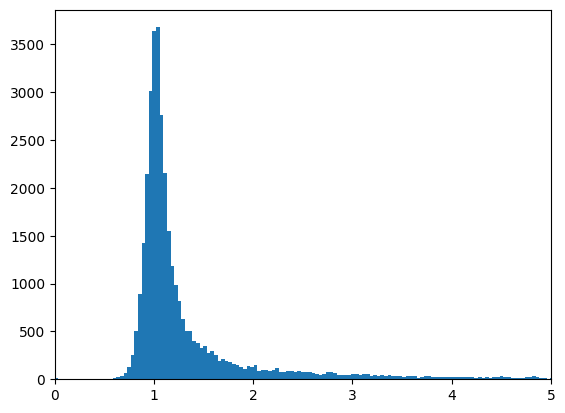

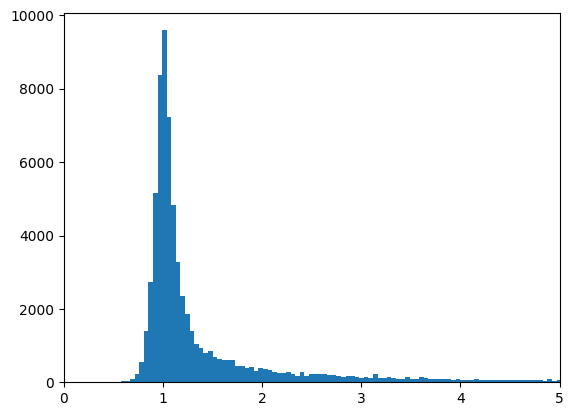

In [ ]:
hist(associated_systems_table,x='ruwe_a',xhigh=5, bins=2000)
hist(non_associated_systems_table,x='ruwe_a',xhigh=5, bins=2000)

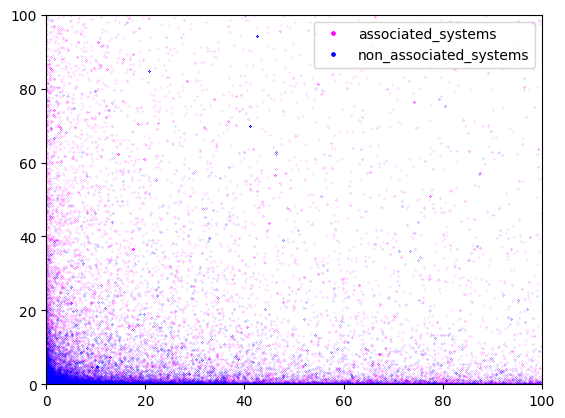

In [ ]:
plot_them(x='delta_mu_ra2', y='delta_mu_dec2' )

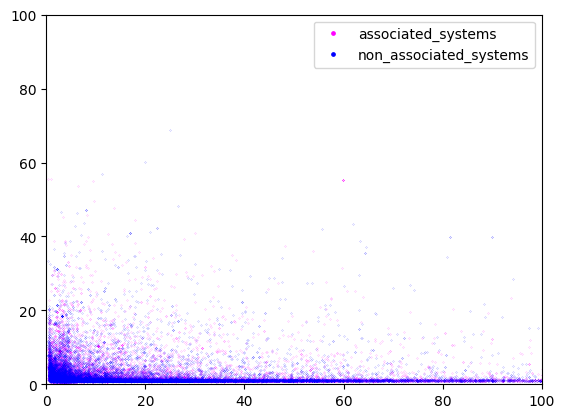

In [ ]:
plot_them(df2 = associated_systems_table, x='separation', y='ruwe_a', y2='ruwe_b')

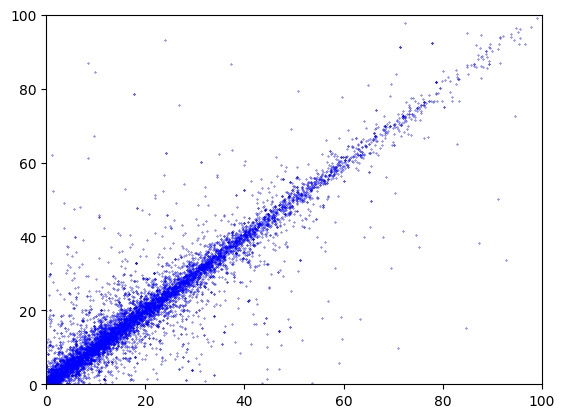

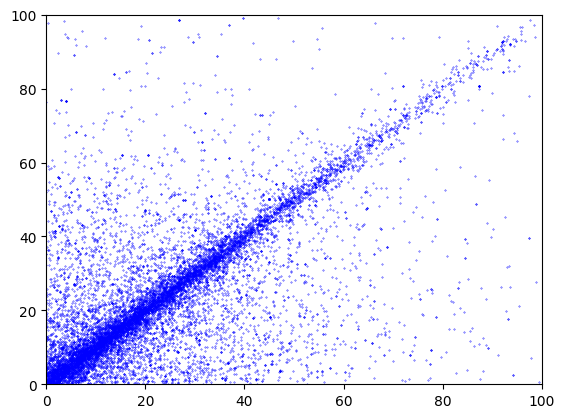

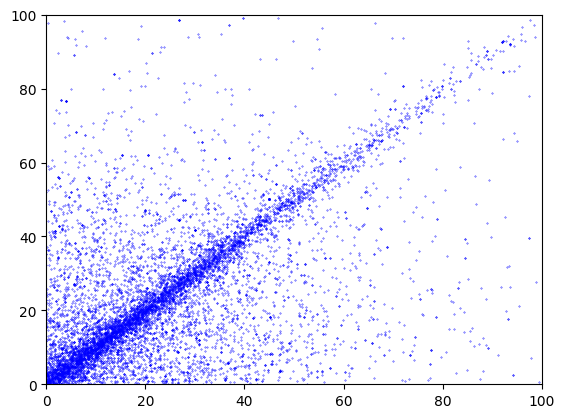

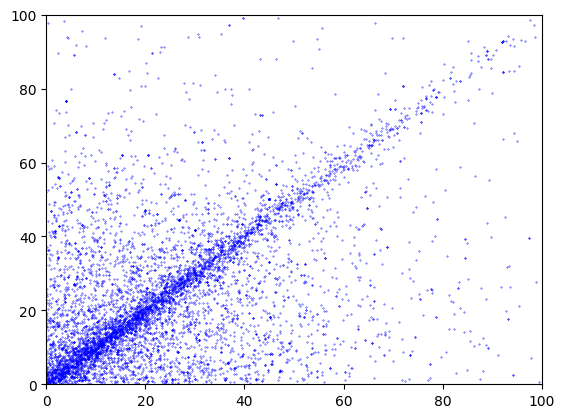

In [ ]:
# plot_them(x='radial_velocity_a', y='radial_velocity_b')
plot_it(associated_systems_table, x='radial_velocity_a', y='radial_velocity_b', markersize=0.6)
plot_it(non_associated_systems_table, x='radial_velocity_a', y='radial_velocity_b', markersize=0.6)
plot_it(non_associated_systems_table_adj, x='radial_velocity_a', y='radial_velocity_b', markersize=0.6)
plot_it(non_associated_systems_table_adj3, x='radial_velocity_a', y='radial_velocity_b', markersize=0.6)

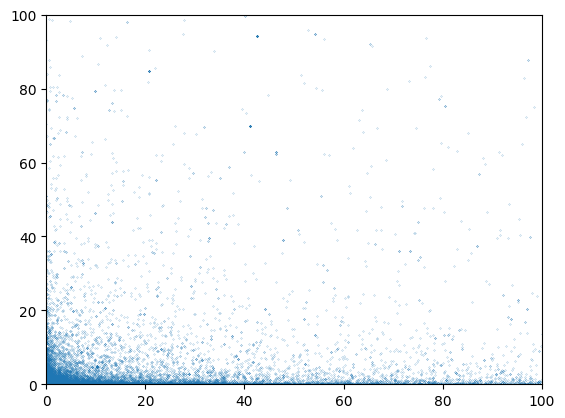

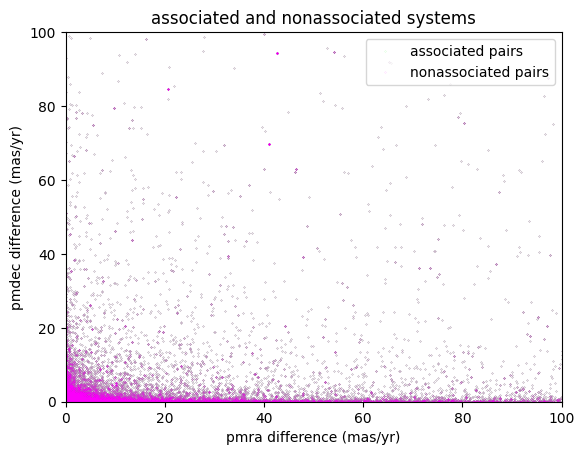

In [ ]:


# plot all pm

a_pmra_diff =  associated_systems_table['delta_mu_ra2']
a_pmdec_diff =  associated_systems_table['delta_mu_dec2']

na_pmra_diff =  non_associated_systems_table['delta_mu_ra2']
na_pmdec_diff =  non_associated_systems_table['delta_mu_dec2']


a_pmra_diff_adj =  associated_systems_table['delta_mu_ra2']
a_pmdec_diff_adj =  associated_systems_table['delta_mu_dec2']

na_pmra_diff_adj =  non_associated_systems_table['delta_mu_ra2']
na_pmdec_diff_adj =  non_associated_systems_table['delta_mu_dec2']

#plt.style.use('seaborn-dark-palette')
plt.xlim([0,100])
plt.ylim([0,100])
plt.plot(a_pmra_diff, a_pmdec_diff, '.', markersize=.3)
plt.show()




# plot likely and possible




# plt.plot(pmra_pos, pmdec_pos, '.', markersize=.3, color = 'teal')

# plt.plot(na_pmra_diff, na_pmdec_diff, '.', markersize=.3, color = 'darkgreen')
plt.plot(a_pmra_diff_adj, a_pmdec_diff_adj, '.', markersize=.3, color = 'lime')
plt.plot(a_pmra_diff, a_pmdec_diff, '.', markersize=.3, color = 'magenta')

plt.xlim([0,100])
plt.ylim([0,100])
plt.xlabel('pmra difference')
plt.ylabel('pmdec difference')
plt.title('associated and nonassociated systems')
plt.legend(["associated pairs", "nonassociated pairs"], loc ="upper right", markerscale = .4)
plt.xlabel('pmra difference (mas/yr)')
plt.ylabel('pmdec difference (mas/yr)')
plt.show()


<Quantity [  65.37566606, 2390.38689345, 7548.16985388, ..., 4741.52892432,
            195.97198774,  195.97198774] mas2 / yr2>

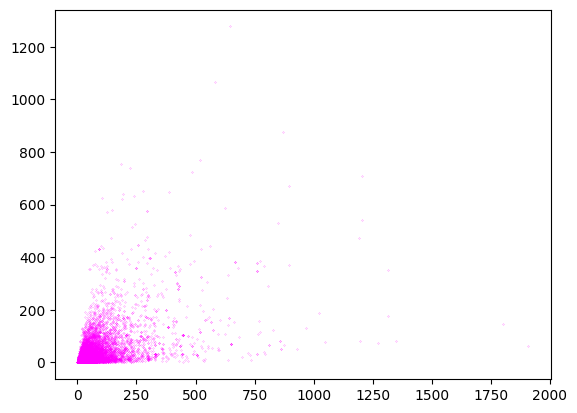

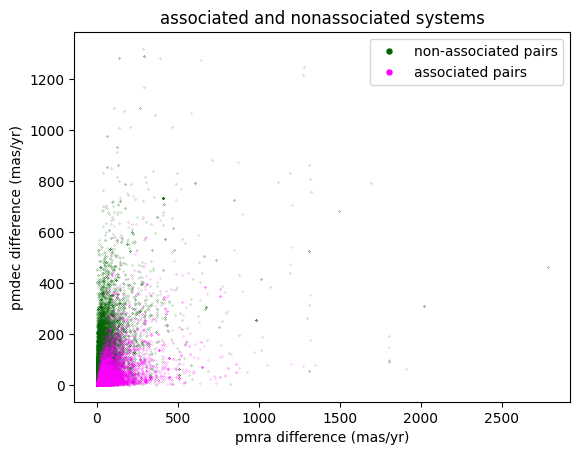

In [ ]:

a_pm_diff = associated_systems_table['delta_mu']/u.mas
na_pm_diff = non_associated_systems_table['delta_mu']/u.mas

a_brighter_parallax = []
na_brighter_parallax = []
for row in range(len(associated_systems_table)):
    if associated_systems_table['phot_g_mean_mag_a'][row] < associated_systems_table['phot_g_mean_mag_b'][row]:
        a_brighter_parallax.append((associated_systems_table['parallax_a'][row]/u.mas)**(3/2))
    else:
        a_brighter_parallax.append((associated_systems_table['parallax_b'][row]/u.mas)**(3/2))
        
for row in range(len(non_associated_systems_table)):
    if non_associated_systems_table['phot_g_mean_mag_a'][row] < non_associated_systems_table['phot_g_mean_mag_b'][row]:
        na_brighter_parallax.append((non_associated_systems_table['parallax_a'][row]/u.mas)**(3/2))
    else:
        na_brighter_parallax.append((non_associated_systems_table['parallax_b'][row]/u.mas)**(3/2))
              


#plt.style.use('seaborn-dark-palette')
# plt.xlim([0,100])
# plt.ylim([0,100])
plt.plot(a_brighter_parallax, a_pm_diff, '.', markersize=.3, color = 'magenta')
plt.show()




# plot likely and possible




# plt.plot(pmra_pos, pmdec_pos, '.', markersize=.3, color = 'teal')

plt.plot(na_brighter_parallax, na_pm_diff, '.', markersize=.3, color = 'darkgreen')
plt.plot(a_brighter_parallax, a_pm_diff, '.', markersize=.3, color = 'magenta')
# plt.xlim([0,100])
# plt.ylim([0,100])
plt.xlabel('pmra difference')
plt.ylabel('pmdec difference')
plt.title('associated and nonassociated systems')
plt.legend(["non-associated pairs", "associated pairs"], loc ="upper right", markerscale = 24)
plt.xlabel('pmra difference (mas/yr)')
plt.ylabel('pmdec difference (mas/yr)')
plt.show()


In [ ]:
associated_systems_table

wds_identifier,wds_rownum,source_id_a,source_id_b,ref_epoch_a,ref_epoch_b,ra_a,ra_b,ra_error_a,ra_error_b,dec_a,dec_b,dec_error_a,dec_error_b,parallax_a,parallax_b,parallax_error_a,parallax_error_b,parallax_over_error_a,parallax_over_error_b,pmra_a,pmra_b,pmra_error_a,pmra_error_b,pmdec_a,pmdec_b,pmdec_error_a,pmdec_error_b,radial_velocity_a,radial_velocity_b,radial_velocity_error_a,radial_velocity_error_b,astrometric_params_solved_a,astrometric_params_solved_b,visibility_periods_used_a,visibility_periods_used_b,astrometric_sigma5d_max_a,astrometric_sigma5d_max_b,ruwe_a,ruwe_b,phot_g_mean_mag_a,phot_g_mean_mag_b,phot_g_mean_flux_over_error_a,phot_g_mean_flux_over_error_b,phot_bp_mean_mag_a,phot_bp_mean_mag_b,phot_bp_mean_flux_over_error_a,phot_bp_mean_flux_over_error_b,phot_rp_mean_mag_a,phot_rp_mean_mag_b,phot_rp_mean_flux_over_error_a,phot_rp_mean_flux_over_error_b,bp_rp_a,bp_rp_b,phot_bp_rp_excess_factor_a,phot_bp_rp_excess_factor_b,separation,delta_mu_orbit,delta_mu_ra2,delta_mu_dec2,delta_mu,sigma_delta_mu
,,,,,,deg,deg,mas,mas,deg,deg,mas,mas,mas,mas,mas,mas,,,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,,,,,,,,,,,,,arcsec,mas / yr,mas2 / yr2,mas2 / yr2,mas / yr,mas / yr
str13,int64,str19,str19,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
--,0,--,--,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan
23599-0412CBL,154510,2447741345626066816,2447741414345542912,2016.0,2016.0,359.98910273713295,359.97866966531234,0.044518087059259415,0.03720077872276306,-4.222556319237097,-4.203852018377835,0.03275608643889427,0.02752946875989437,7.341587718785455,7.35690441227576,0.05945796146988869,0.05121235176920891,123.47526550292969,143.65487670898438,-50.914530329842016,-51.0497075734875,0.05028996989130974,0.04505782201886177,-96.61254408846709,-96.83993825765693,0.035345956683158875,0.029300067573785782,nan,-1.6464951038360596,nan,9.40335750579834,31.0,31.0,15.0,15.0,0.07105975598096848,0.06368912011384964,0.9988299012184143,1.1016029119491577,15.876060485839844,15.31973648071289,1799.7384033203125,2187.729736328125,17.351524353027344,16.692827224731445,167.6161346435547,216.22621154785156,14.682077407836914,14.162753105163574,646.338134765625,727.8319702148438,2.6694469451904297,2.530074119567871,1.4504989385604858,1.4265681505203247,77.05281251384164,77.07075159620221,3385.2978385225424,0.051708108181535664,58.183756724972,0.06752226982816444
23599+1413SKF,154508,2767453557178693504,2767453557180534784,2016.0,2016.0,359.98521541821066,359.98514367073517,0.037190500646829605,0.03587879613041878,14.216942479375586,14.217371899389931,0.025418229401111603,0.02432810328900814,1.6240396632633158,1.5957870668654368,0.04658302664756775,0.04530474171042442,34.86333465576172,35.2234001159668,-2.4962877740722207,-2.748245912554472,0.046957191079854965,0.04558112099766731,-0.5499944481795733,0.09598252165938462,0.027971575036644936,0.026745609939098358,nan,nan,nan,nan,95.0,95.0,16.0,16.0,0.06524630635976791,0.06335528194904327,1.0669173002243042,1.1005388498306274,15.820831298828125,15.545248985290527,328.1726989746094,1095.4854736328125,nan,16.060087203979492,nan,36.727745056152344,nan,14.258393287658691,nan,85.24205017089844,nan,1.8016939163208008,nan,1.8284350633621216,1.566056890781894,1.109989461139578,0.009367756645182246,0.41728624556232197,0.653187570463113,0.040304973657372414
23599+2353DVG,154507,2848

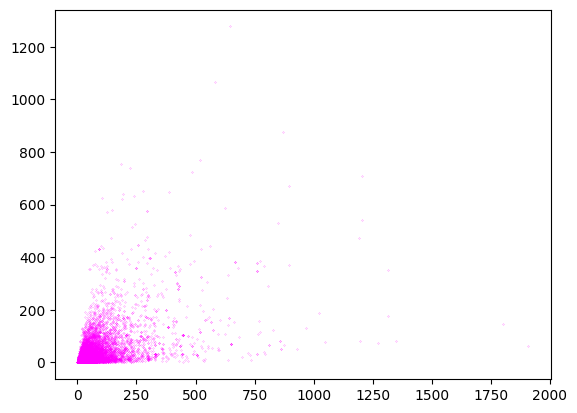

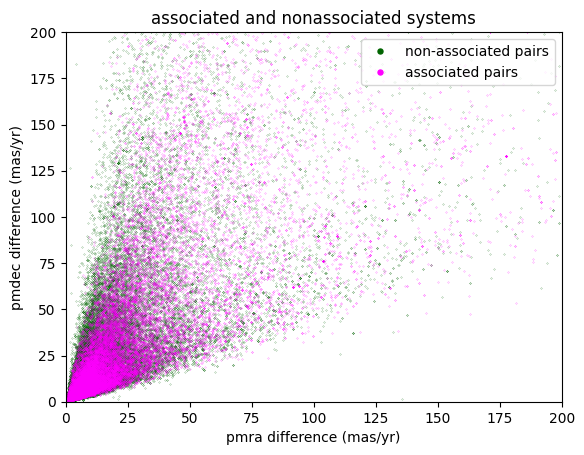

In [ ]:

a_pm_diff = associated_systems_table['delta_mu']/u.mas
na_pm_diff = non_associated_systems_table['delta_mu']/u.mas

a_delta_mu_orbit = associated_systems_table['delta_mu_orbit']/u.mas
na_delta_mu_orbit = non_associated_systems_table['delta_mu_orbit']/u.mas


#plt.style.use('seaborn-dark-palette')
# plt.xlim([0,100])
# plt.ylim([0,100])
plt.plot(a_brighter_parallax, a_pm_diff, '.', markersize=.3, color = 'magenta')
plt.show()




# plot likely and possible




# plt.plot(pmra_pos, pmdec_pos, '.', markersize=.3, color = 'teal')

plt.plot(na_brighter_parallax, na_delta_mu_orbit, '.', markersize=.3, color = 'darkgreen')
plt.plot(a_brighter_parallax, a_delta_mu_orbit, '.', markersize=.3, color = 'magenta')
plt.xlim([0,200])
plt.ylim([0,200])
plt.xlabel('pmra difference')
plt.ylabel('pmdec difference')
plt.title('associated and nonassociated systems')
plt.legend(["non-associated pairs", "associated pairs"], loc ="upper right", markerscale = 24)
plt.xlabel('pmra difference (mas/yr)')
plt.ylabel('pmdec difference (mas/yr)')
plt.show()


In [ ]:
=

In [ ]:
mean(a_delta_mu_orbit)

TypeError: ignored

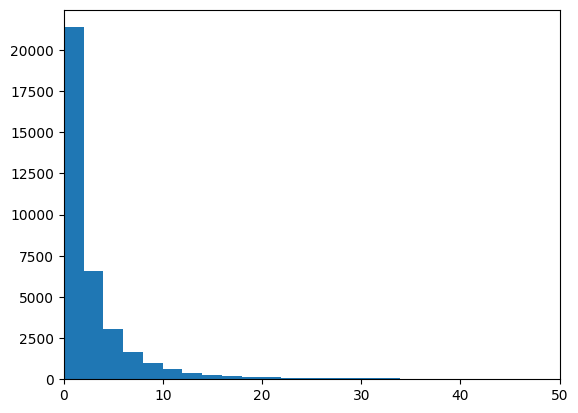

<function matplotlib.pyplot.show(close=None, block=None)>

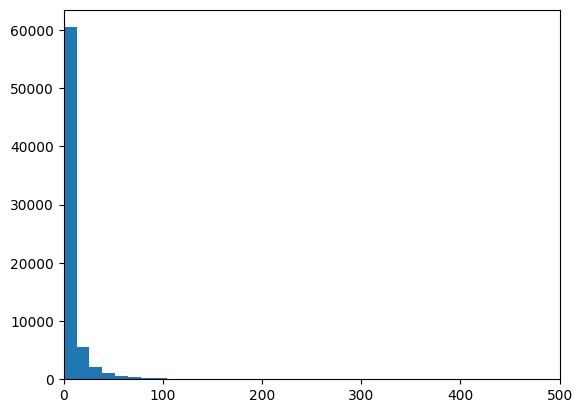

In [ ]:
import math
x = associated_systems_table['separation']/(associated_systems_table['parallax_a'])
y = non_associated_systems_table['separation']/non_associated_systems_table['parallax_a']
plt.hist(x, bins=100)


plt.xlim([0,50])

plt.show() 

plt.hist(y, bins=50)
plt.xlim([0,500])

plt.show

In [ ]:
from statistics import mean

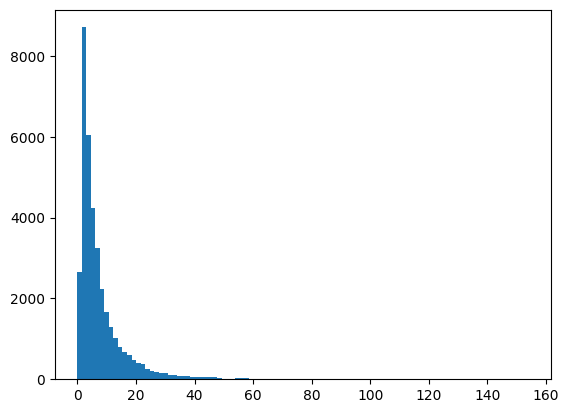

In [ ]:

a_mags = associated_systems_table['parallax_a']

plt.hist(a_mags, bins=100)
# plt.xlim([0,1000])

plt.show() 


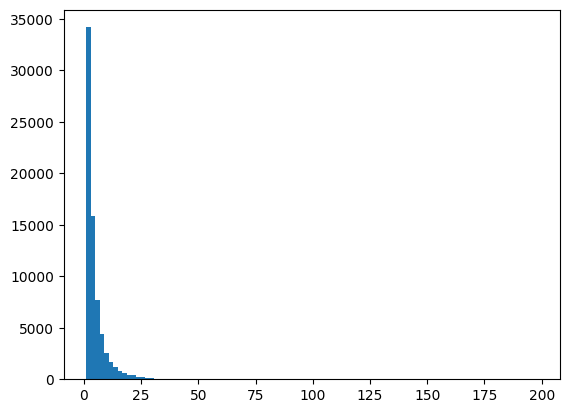

In [ ]:
na_mags = non_associated_systems_table['parallax_a']
plt.hist(na_mags, bins=100)
# plt.xlim([0,200])
plt.show() 

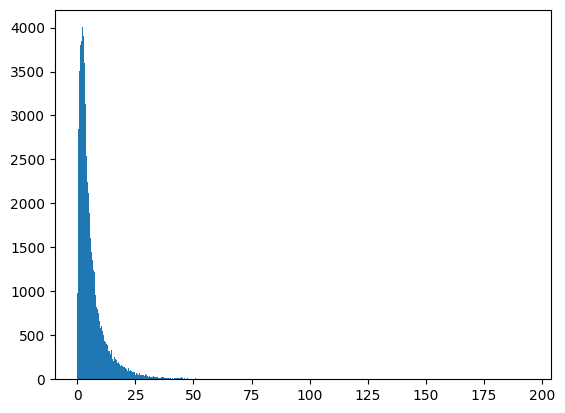

In [ ]:
old_mags = old_results['parallax_a*']
plt.hist(old_mags, bins=500)
plt.show() 

In [ ]:
def plot_cmd(df):
  """ Plot a color magnitude diagram

  df: DataFrame or Table with photometry data """

  x = df['bp_rp_a']
  y = df['phot_g_mean_mag_a']

  plt.figure()
  plt.plot(x, y, 'ko', markersize = 0.3, alpha = 0.1)

  plt.xlabel("Color (g-i)")
  plt.ylabel("Magnitude g")
    
  # plt.xlim([-1, 6])
  # plt.ylim([22, 0])

In [ ]:
plot_cmd(associated_systems_table)

NameError: ignored

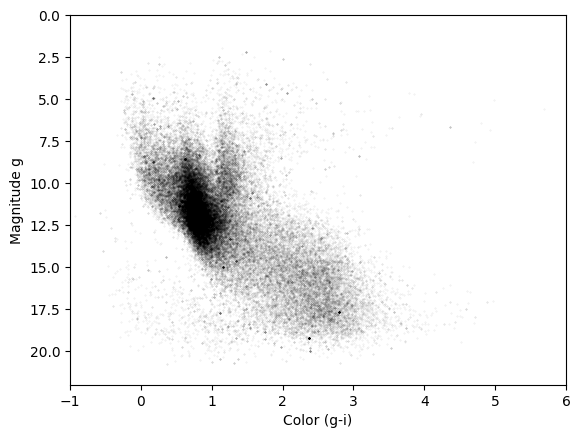

In [ ]:
plot_cmd(non_associated_systems_table)